## AUTHOR - RIYA DAGA

GRIP- THE SPARKS FOUNDATION

Data Science & Business Analytics Internship

Exploratory Data Analysis
TASK-3 : Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

As a business manager, try to find out the weak areas where one can work to make more profit. Explore and derive all business problems from data.

In [46]:
#importing libraries to be used.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wg
wg.filterwarnings("ignore")

In [18]:
#reading the dataset.
df = pd.read_csv(r"C:\Users\reeya\Downloads\SampleSuperstore.csv")

In [19]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [20]:
# data preprocessing.
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [22]:
#checking for missing values. 
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [23]:
#checking for duplicate values.
df.duplicated().sum()

17

In [24]:
#deleting the duplicate values.
df.drop_duplicates(inplace=True)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [25]:
#rechecking duplicate values.
df.duplicated().sum()

0

In [26]:
#removing the unnecessary column.
df.drop(['Postal Code'],axis=1,inplace=True)

In [27]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Exploratory Data Analysis

In [28]:
#checking correlation
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


In [29]:
#checking covariance
df.cov()

,Sales,Quantity,Discount,Profit
Sales,389028.396022,278.765576,-3.645637,70057.067126
Quantity,278.765576,4.958001,0.003990,34.565743
Discount,-3.645637,0.003990,0.042624,-10.632751
Profit,70057.067126,34.565743,-10.632751,54970.478824


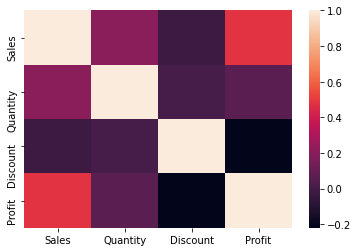

In [30]:
#finding pairwise correlation between columns and visualing using heatmaps.
fig, axes = plt.subplots(1,1, figsize = (6,4))
sns.heatmap(df.corr())
plt.show()

### Observation- There is a negative correlation between Discount and Profit. As discount increases Profit decreases.

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

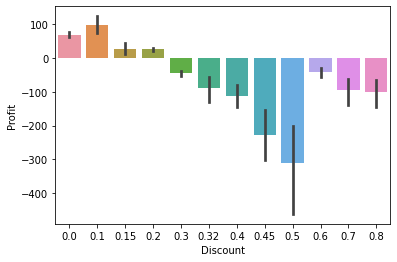

In [90]:
sns.barplot(x=df.Discount,y=df.Profit)

### Observation- When we compare the profit with respect to discounts, all the discounts above 20% is facing a major loss.

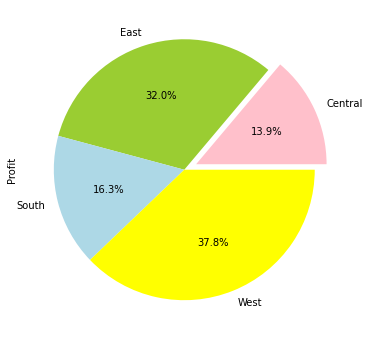

In [95]:
plt.figure(figsize =(8,6))
df.groupby(by ='Region')['Profit'].sum().plot(kind = 'pie',autopct='%1.1f%%',explode=(0.1, 0, 0,0),colors = ['pink', 'yellowgreen', 'lightblue', 'yellow'])
plt.show()

### Observation- From the above pie chart it is visible that the Central region has the lowest profit whereas the West has the highest profit. So in order to increase profit we must focus on Central and South region.

<AxesSubplot:xlabel='Region'>

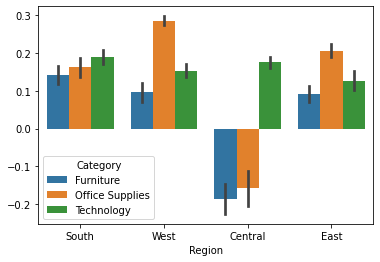

In [77]:
sns.barplot(x=df.Region, y=df.Profit/df.Sales,hue=df.Category)

### Observation- Furniture and Office Supplies faces loss in Central region whereas Technology is making profit in every region.

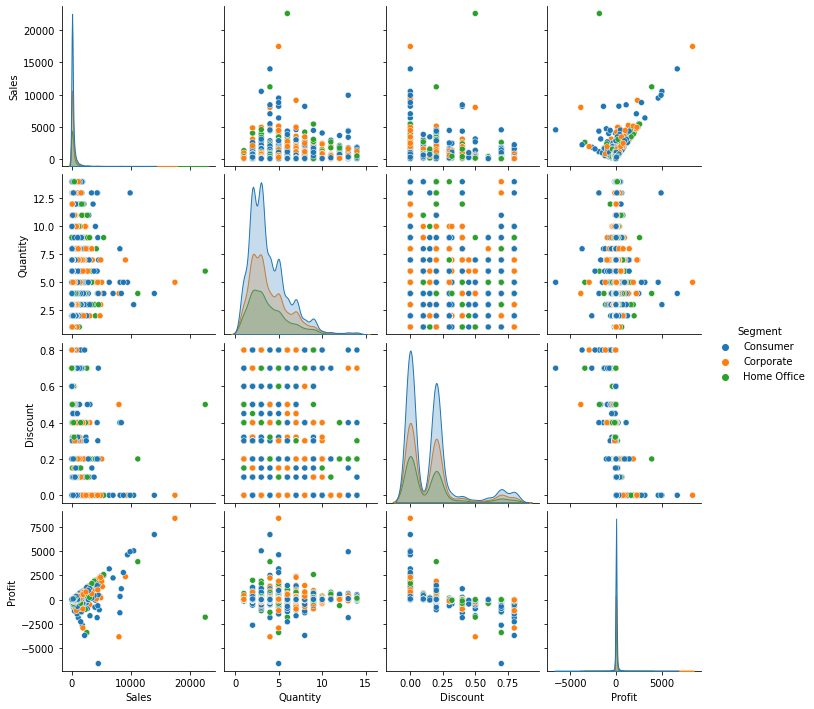

In [74]:
sns.pairplot(df, hue = "Segment")

<Figure size 720x720 with 0 Axes>

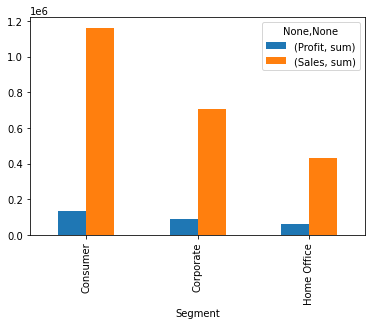

In [92]:
plt.figure(figsize=(10,10))
df.groupby('Segment')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

### Observation- Consumer has the highest profit & sales and Home Office has the least.

<AxesSubplot:>

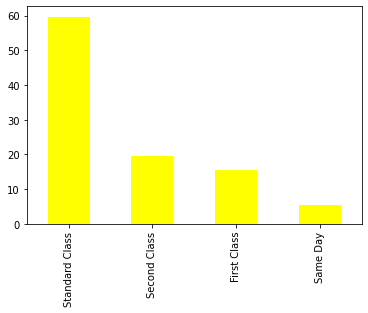

In [91]:
((df['Ship Mode'].value_counts()/len(df['Ship Mode']))*100).plot(kind="bar", color="yellow")

### Observation- Maximum number of shipments belong to tha standard class whereas, very less number of shipments are done on the same day (10%).

<AxesSubplot:xlabel='State'>

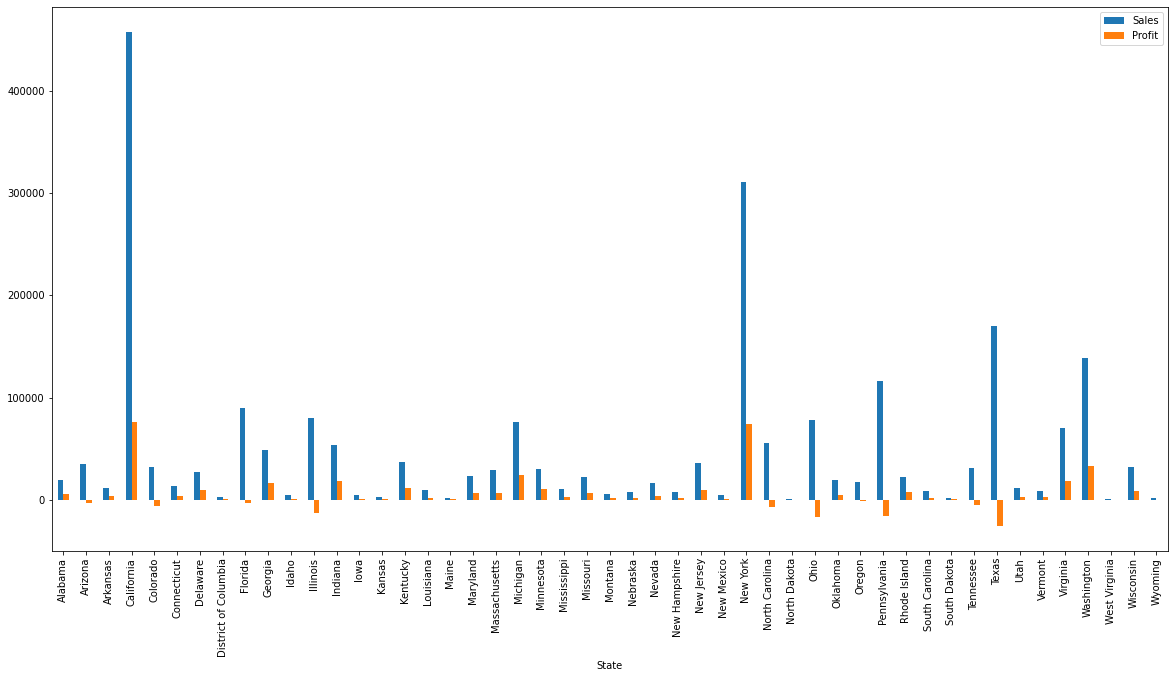

In [68]:
dataplot = df.groupby(['State'])['Sales', 'Profit'].sum()
dataplot.plot.bar(figsize = (20,10))

### Observation- We can see California has highest sales and profit followed by New York.

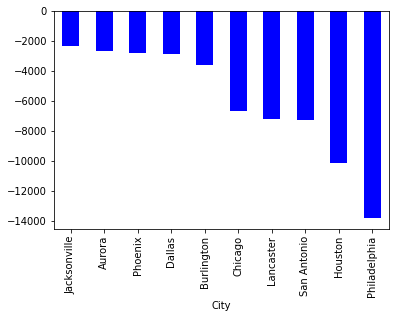

In [88]:
df.groupby(by ='City')['Profit'].sum().sort_values(ascending = False)[521:].plot(kind = 'bar',color='blue')
plt.show()

### Observation- In order to increase profit we must focus on Philadelphia since it has the lowest profit.

<Figure size 3600x1440 with 0 Axes>

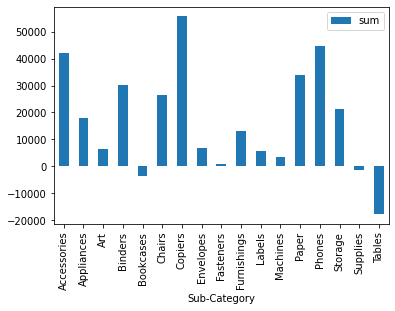

In [76]:
plt.figure(figsize=(50,20))
df.groupby('Sub-Category')['Profit'].agg(['sum']).plot.bar()
plt.show()

### Observation- Tables and Bookcases sub-category faces huge loss.